# Homework 2. GDP 와 삶의 만족도 데이터셋을 활용해 1차 선형 함수 모델 학습하기
### 과목코드: [입력하시오]
### 팀명: [입력하시오]
### 팀장: [입력하시오]
### 팀원: [입력하시오]

#### 설명. 아래의 예제는 1주차에 학습한 국가별 1인 GDP 에 따른 삶의 만족도를 1차 선형 함수로 모델링한 결과이다.

In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

font_path = './NanumGothic-Regular.ttf'  # 경로가 다를 경우 조정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
rc("axes", unicode_minus=False)
    

def prepare_country_stats(oecd_bli, gdp_per_capita, remove_indices = [0, 1, 6, 8, 33, 34, 35], scale=1e-5):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
    
    country_stats["GDP per capita"] *= scale
    return country_stats

In [4]:
## 데이터 적재
oecd_bli = pd.read_csv("./oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("./gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [5]:
## 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

#### 아래의 그림의 1인당 GDP (100K $) 에 대한 삶의 만족도 를 시각화한 결과이다.

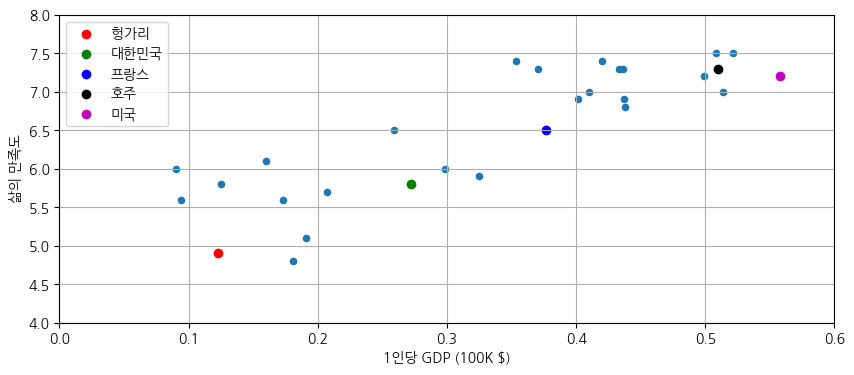

In [7]:
## 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(10, 4))
plt.scatter(country_stats['GDP per capita']['Hungary'],         country_stats["Life satisfaction"]['Hungary'],          c='r', label='헝가리')
plt.scatter(country_stats['GDP per capita']['Korea'],           country_stats["Life satisfaction"]['Korea'],            c='g', label='대한민국')
plt.scatter(country_stats['GDP per capita']['France'],          country_stats["Life satisfaction"]['France'],           c='b', label='프랑스')
plt.scatter(country_stats['GDP per capita']['Australia'],       country_stats["Life satisfaction"]['Australia'],        c='k', label='호주')
plt.scatter(country_stats['GDP per capita']['United States'],   country_stats["Life satisfaction"]['United States'],    c='m', label='미국')
plt.ylabel('삶의 만족도')
plt.xlabel('1인당 GDP (100K $)')
plt.ylim([4, 8])
plt.xlim([0, 0.6])
plt.grid()
plt.legend()
plt.show()


#### 이를 Linear Regression 모델을 이용하여 학습하면 아래와 같은 함수를 얻을 수 있다.

#### 삶의_만족도 = weight * 1인당_GDP + bias

In [9]:
## 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

## 모델 훈련
model.fit(X, Y)

weight = model.coef_[0, 0]  # 학습된 가중치 (weight)
bias = model.intercept_[0]  # 학습된 편향 (bias)

print(f'[학습된 모델] 삶의_만족도 = {weight:.2e} X 1인당_GDP + {bias:.2f}')

[학습된 모델] 삶의_만족도 = 4.91e+00 X 1인당_GDP + 4.85


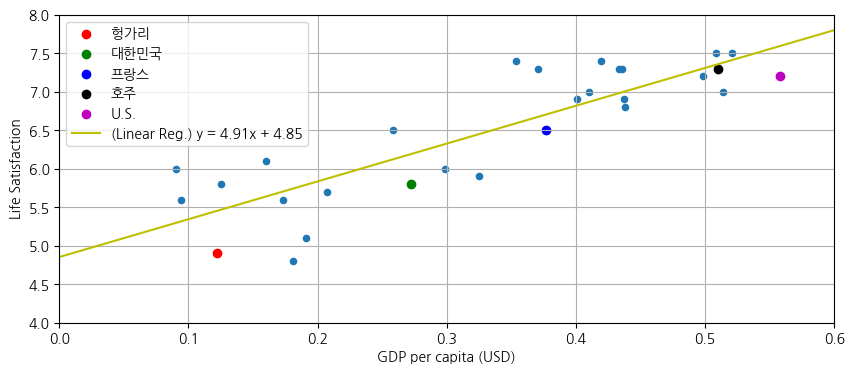

In [10]:
## 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(10, 4))

plt.scatter(country_stats['GDP per capita']['Hungary'],         country_stats["Life satisfaction"]['Hungary'],          c='r', label='헝가리')
plt.scatter(country_stats['GDP per capita']['Korea'],           country_stats["Life satisfaction"]['Korea'],            c='g', label='대한민국')
plt.scatter(country_stats['GDP per capita']['France'],          country_stats["Life satisfaction"]['France'],           c='b', label='프랑스')
plt.scatter(country_stats['GDP per capita']['Australia'],       country_stats["Life satisfaction"]['Australia'],        c='k', label='호주')
plt.scatter(country_stats['GDP per capita']['United States'],   country_stats["Life satisfaction"]['United States'],    c='m', label='U.S.')

plt.plot(np.linspace(0, 0.6),                                 weight*np.linspace(0, 0.6) + bias,                    'y',    label=rf'(Linear Reg.) y = {weight:.2f}x + {bias:.2f}')

plt.ylabel('Life Satisfaction')
plt.xlabel('GDP per capita (USD)')
plt.ylim([4, 8])
plt.xlim([0, 0.6])
plt.grid()
plt.legend()
plt.show()


#### 문제. 아래의 `코드`를 완성하고, 그에 대한 `분석`을 작성하시오.

1. (코드) 경사 하강법을 수행하기 위해, w 와 b 의 gradient 를 구하는 함수를 작성하시오.
   - (분석) 경사 하강법에 대해 설명하고, w 와 b 에 gradient 를 계산하시오.

In [41]:
w = 1
b = 0
    # 기울기 계산
w_gradient = 2 * X * ((w * X + b - Y))
b_gradient = 2 *((w * X + b) - Y)
for i in range (0,29):
    print("w[",i,"],b[",i,"]",w_gradient[i],b_gradient[i])

w[ 0 ],b[ 0 ] [-1.07019139] [-11.81890172]
w[ 1 ],b[ 1 ] [-1.03917287] [-11.01125256]
w[ 2 ],b[ 2 ] [-1.16954661] [-9.55520212]
w[ 3 ],b[ 3 ] [-1.41823207] [-11.35009332]
w[ 4 ],b[ 4 ] [-1.89984467] [-11.88016528]
w[ 5 ],b[ 5 ] [-1.87648973] [-10.85423834]
w[ 6 ],b[ 6 ] [-1.66890795] [-9.23871424]
w[ 7 ],b[ 7 ] [-1.87727533] [-9.81756816]
w[ 8 ],b[ 8 ] [-2.27753579] [-10.98535036]
w[ 9 ],b[ 9 ] [-3.22861697] [-12.48270558]
w[ 10 ],b[ 10 ] [-3.0067271] [-11.05609606]
w[ 11 ],b[ 11 ] [-3.40558719] [-11.40266838]
w[ 12 ],b[ 12 ] [-3.62223218] [-11.1502891]
w[ 13 ],b[ 13 ] [-4.98098345] [-14.09313328]
w[ 14 ],b[ 14 ] [-5.1340893] [-13.85910218]
w[ 15 ],b[ 15 ] [-4.61386956] [-12.24649988]
w[ 16 ],b[ 16 ] [-5.21300683] [-12.99786736]
w[ 17 ],b[ 17 ] [-5.40336876] [-13.18006978]
w[ 18 ],b[ 18 ] [-5.85978709] [-13.96052024]
w[ 19 ],b[ 19 ] [-5.95093454] [-13.73336078]
w[ 20 ],b[ 20 ] [-5.98580846] [-13.7279377]
w[ 21 ],b[ 21 ] [-5.6515581] [-12.92551938]
w[ 22 ],b[ 22 ] [-5.56963894] [-12.724

2. (코드) 사용되는 변수들을 초기화 (initialization) 하시오.
   - (분석) 사용되는 변수들에 대해 설명하시오.

In [18]:
w = 1  # 가중치(weight)
b = 0  # 편향(bias)
theta = (b,w) 
X_b = np.c_[np.ones_like(X), X] 
n_epochs = 50  # 학습 횟수 (Epochs)
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 (Learning schedule hyperparameters)
def learning_schedule(t):
    return t0 / (t + t1)  # 학습률 계산

3. (코드) 확률적 경사 하강법 (Stocastic Gradient Descent Method) 를 이용하여, 1차원 선형 함수를 학습하시오.
   - (분석) 상세히 주석을 작성하시오.

In [43]:
lst_w = []
lst_b = []
lst_loss = []

lst_w.append(w)
lst_b.append(b)

random_index = list(range(len(X)))

# Stochastic Gradient Descent (SGD) 수행
for epoch in range(n_epochs):  # 각 epoch 반복    
    np.random.shuffle(random_index)
    for i in random_index:  # 각 데이터 포인트에 대해 반복
    
        # 데이터 불러오기
        x = X[i][0]
        y = Y[i][0]     
        # 선택된 데이터에 대한 그래디언트 계산
        w_gradient = 2 * X * ((w * X + b - Y))
        b_gradient = 2 * ((w * X + b)-Y)
        gradients = (b,w)
        loss = 1 / len(X) * np.sum((X_b * theta - y) ** 2)  
        # 학습률 계산
        eta = learning_schedule(epoch * len(X) + i)
        # 파라미터 업데이트
        w = w - w_gradient
        b = b - b_gradient             
        theta = theta - eta * gradients
        
        # 파라메터 누적하기
        lst_w.append(w)
        lst_b.append(b)
        lst_loss.append(loss)

TypeError: can't multiply sequence by non-int of type 'float'

#### (수정하지 마시오.) 결과 출력 

In [ ]:
plt.plot(lst_loss, label='MSE loss')
plt.legend()
plt.grid()
plt.xlim([0, n_epochs])
plt.title('Learning Curve')
plt.xlabel('Number of epochs')
plt.ylabel('MSE losses')
plt.show()

plt.plot(lst_w, label='weight: w')
plt.plot(lst_b, label='bias: b')
plt.legend()
plt.grid()
plt.xlim([0, n_epochs])
plt.title('$y = wx + b$')
plt.xlabel('Number of epochs')
plt.ylabel('Values')
plt.show()


In [ ]:
## 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(10, 4))

plt.scatter(country_stats['GDP per capita']['Hungary'],         country_stats["Life satisfaction"]['Hungary'],          c='r', label='헝가리')
plt.scatter(country_stats['GDP per capita']['Korea'],           country_stats["Life satisfaction"]['Korea'],            c='g', label='대한민국')
plt.scatter(country_stats['GDP per capita']['France'],          country_stats["Life satisfaction"]['France'],           c='b', label='프랑스')
plt.scatter(country_stats['GDP per capita']['Australia'],       country_stats["Life satisfaction"]['Australia'],        c='k', label='호주')
plt.scatter(country_stats['GDP per capita']['United States'],   country_stats["Life satisfaction"]['United States'],    c='m', label='U.S.')

plt.plot(np.linspace(0, 0.6),                                 weight*np.linspace(0, 0.6) + bias,                    'y',    label=rf'(Linear Reg.) y = {weight:.2f}x + {bias:.2f}')
plt.plot(np.linspace(0, 0.6),                                 w*np.linspace(0, 0.6) + b,                            'k--',  label=rf'(GD Method) y = {w:.2f}x + {b:.2f}')

plt.ylabel('Life Satisfaction')
plt.xlabel('GDP per capita (100K $)')
plt.ylim([4, 8])
plt.xlim([0, 0.6])
plt.grid()
plt.legend()
plt.show()


4. (코드) weight 와 bias 의 초기값, epoch 의 횟수, 그리고 학습률 (learning rate) 등을 변경해가며 위의 결과 출력을 수행하시오.
   - (분석) weight 와 bias 의 초기값, epoch 의 횟수, 그리고 학습률 (learning rate) 등이 달라짐에 따라, 어떤 변화가 있는 관측하고 분석하시오.